# Shared Social Responsibility: Yellow Group 2

### Group Members: 
Aman, Nivan Vora, Gabriel Andaya, Menji Wei

### Subject: 
Shared Social Responsibility - A Field Experiment on Pricing Strategies in an Amusement Park

### Introduction:
The amusement park industry constantly seeks innovative ways to maximize revenue while enhancing customer engagement. In this context, our company conducted a field experiment at an amusement park, investigating how different pricing strategies for photographs sold after a roller coaster ride affect consumer behavior and sales. The photos, taken during the ride, were offered under four distinct pricing conditions: a flat-rate price, a flat-rate price with a charitable donation component, a name-your-own-price (NYOP) model, and an NYOP model with a charitable component. These strategies were designed to explore how consumers respond to fixed and flexible pricing models, and whether introducing a charitable cause influences purchasing decisions.

The charitable partner for this experiment was a nationally recognized patient-support foundation, adding a social responsibility component to two of the pricing conditions. The goal was to assess not only the profitability of each strategy but also the broader societal impact, considering both the amusement park's profits and the contributions to charity.

# Analysis


### Flat Rate Pricing

Here, we are using the "Sales.csv" Dataset: This dataset contains the number of photos sold, the number of riders, and the total merchandise revenues for each of the four conditions. Each condition was in place for 2 days (two rows of data) except for the last condition, NYOP Charity, which was in place for 3 days.

It has the following variables: 
1. Condition = A factor with four levels, matching each of the possibilities described above: FR, FR Charity, NYOP, and NYOP Charity
2. NumberSold = The total number of photos purchased by consumers on a given day under the condition described
3. Riders = The total number of riders placed into the condition on a given day under the condition described
4. MerchandiseRevenues = Ancillary revenues related to merchandise purchased by riders at a location adjacent to the ride. Revenues are in US dollars.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import pyrsm as rsm
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importing the dataset
df1=pd.read_csv('data/Sales.csv')

In [4]:
# Calculate the proportion of photos sold in each flat-rate condition (FR and FR Charity)
fr_data = df1[df1['Condition'].isin(['FR', 'FR Charity'])]

# Calculate proportions
fr_data['ProportionSold'] = fr_data['NumberSold'] / fr_data['Riders']

# Separate the proportions for FR and FR Charity
fr_proportion = fr_data[fr_data['Condition'] == 'FR']['ProportionSold'].mean()
fr_charity_proportion = fr_data[fr_data['Condition'] == 'FR Charity']['ProportionSold'].mean()

# Get the total number of riders for both FR and FR Charity
n_fr = fr_data[fr_data['Condition'] == 'FR']['Riders'].sum()
n_fr_charity = fr_data[fr_data['Condition'] == 'FR Charity']['Riders'].sum()

fr_data_grouped = df1[df1['Condition'].isin(['FR', 'FR Charity'])].groupby('Condition').agg(
    TotalPhotosSold=('NumberSold', 'sum'),
    TotalRiders=('Riders', 'sum'))

# Calculate the proportion of photos sold (TotalPhotosSold / TotalRiders)
fr_data_grouped['ProportionSold'] = fr_data_grouped['TotalPhotosSold'] / fr_data_grouped['TotalRiders']

# Display the calculated proportions and sample sizes for both FR and FR Charity
print(fr_data_grouped)

            TotalPhotosSold  TotalRiders  ProportionSold
Condition                                               
FR                      140        28224        0.004960
FR Charity              180        30592        0.005884


/tmp/ipykernel_89277/123274009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_data['ProportionSold'] = fr_data['NumberSold'] / fr_data['Riders']


In [5]:
# Calculate the z-score test statistic for the difference between two population proportions
z = (fr_proportion - fr_charity_proportion) / np.sqrt(((fr_proportion * (1 - fr_proportion)) / n_fr) + ((fr_charity_proportion * (1 - fr_charity_proportion)) / n_fr_charity))

print(f"Z-statistic: {z}")

Z-statistic: -1.3199521668163439


In [6]:
# Calculate two-sided p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"P-value: {p_value}")

P-value: 0.18685098875148087


The z-statistic is 1.31995, and the corresponding p-value is approximately 0.187

Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This means that, at the 5% significance level, there is no statistically significant difference between the proportion of photo purchases in the FR condition and the FR Charity condition.



### NYOP Pricing
Here, we are using the NYOP.csv datast: This dataset contains more specific information related to the NYOP and NYOP Charity conditions. Each row represents the purchasing behavior of a rider who made a purchase. Information on the condition of the rider, the number of photos purchased, and the price chosen by the rider have been collected.

It has the following variables:
1. Condition = A factor with two levels, NYOP and NYOP Charity, capturing any rider who was in one of the two Name Your Own Price conditions
2. Number = The total number of photos purchased by a given rider
3. Price = The price chosen by the rider and paid in US dollars.

In [7]:
# Importing the dataset
nyop_data=pd.read_csv('data/NYOP.csv')

In [9]:
# Calculate the proportion of purchases for NYOP and NYOP Charity
nyop_data_grouped = nyop_data.groupby('Condition').agg(
    TotalPhotosPurchased=('Number', 'sum'),
    TotalRiders=('Number', 'count')
)

# Calculate the proportion of photos purchased (TotalPhotosPurchased / TotalRiders)
nyop_data_grouped['ProportionPurchased'] = nyop_data_grouped['TotalPhotosPurchased'] / nyop_data_grouped['TotalRiders']

# Display the calculated proportions and sample sizes (riders) for both NYOP and NYOP Charity
nyop_data_grouped# Load the NYOP.csv dataset
nyop_data=pd.read_csv('data/NYOP.csv')

# Calculate the proportion of purchases for NYOP and NYOP Charity
nyop_data_grouped = nyop_data.groupby('Condition').agg(
    TotalPhotosPurchased=('Number', 'sum'),
    TotalRiders=('Number', 'count')
)

# Calculate the proportion of photos purchased (TotalPhotosPurchased / TotalRiders)
nyop_data_grouped['ProportionPurchased'] = nyop_data_grouped['TotalPhotosPurchased'] / nyop_data_grouped['TotalRiders']

# Display the calculated proportions and sample sizes (riders) for both NYOP and NYOP Charity
nyop_data_grouped

,TotalPhotosPurchased,TotalRiders,ProportionPurchased
Condition,,,
NYOP,2370,1641,1.444241
NYOP Charity,1793,1457,1.230611


In [10]:
# Calculate the z-score test statistic for the difference between two population proportions
z1 = (1.444241 - 1.230611)/np.sqrt(((1.444241*0.444241)/1641) + ((1.230611*0.230611)/1457))

print(f"Z-statistic: {z}")

Z-statistic: -1.3199521668163439


In [11]:
# Calculate two-sided p-value
p_value = 2 * (1 - norm.cdf(abs(z1)))

print(f"P-value: {p_value}")

P-value: 0.0


The z-value we obtained (8.83) suggests a very large difference between the two proportions. The p-value is effectively 0. This means that the probability of observing such a large difference between the two proportions by random chance is extremely low.

A p-value of 0 (or a very small number close to 0) indicates that there is very strong evidence against the null hypothesis which means that the result is highly significant at the 5% level (and well beyond). At the 5% significance level (or any reasonable significance level), we would reject the null hypothesis. This suggests that there is a statistically significant difference between the proportion of purchases in the NYOP and NYOP Charity conditions.


### NYOP Part-2

A. Load “NYOP.csv”. Create a variable called UnitPrice which takes the variable, Price, and divides it by Number. After doing so, next change the type of the variable, Number, to a factor variable.

In [13]:
# Load the data
data = pd.read_csv('data/NYOP.csv')

# Create UnitPrice variable
data['UnitPrice'] = data['Price'] / data['Number']
data['Number'] = data['Number'].astype('category')

B. Visualize both Price and UnitPrice against the factor variable, Number by creating box plots and interpreting them.

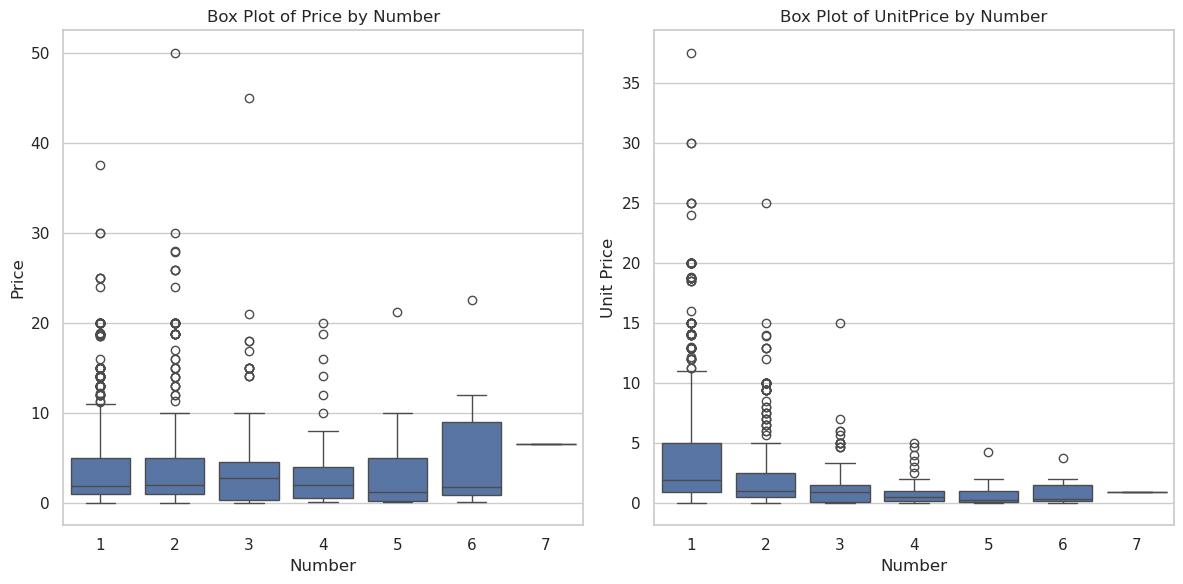

In [14]:
# Set the style
sns.set(style="whitegrid")

# Create box plots
plt.figure(figsize=(12, 6))

# Box plot for Price
plt.subplot(1, 2, 1)
sns.boxplot(x='Number', y='Price', data=data)
plt.title('Box Plot of Price by Number')
plt.xlabel('Number')
plt.ylabel('Price')

# Box plot for UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x='Number', y='UnitPrice', data=data)
plt.title('Box Plot of UnitPrice by Number')
plt.xlabel('Number')
plt.ylabel('Unit Price')

plt.tight_layout()
plt.show()

C. Determine the average unit purchase price for both the NYOP and the NYOP Charity conditions. Does the difference seem small or substantial? Formulate a statistical test to determine if these two average unit prices are different.

In [15]:
from scipy import stats

# Calculate average unit prices
average_prices = data.groupby('Condition')['Price'].mean().reset_index()
print(average_prices)

# Calculate the difference in averages
diff = average_prices['Price'].diff().abs()
print(f'Difference in averages: {diff.iloc[1]}')

nyop = data[data['Condition'] == 'NYOP']['Price']
nyop_charity = data[data['Condition'] == 'NYOP Charity']['Price']

# Perform Welch's t-test (assuming variances may be unequal)
t_stat, p_value = stats.ttest_ind(nyop, nyop_charity, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

      Condition     Price
0          NYOP  1.325899
1  NYOP Charity  6.600075
Difference in averages: 5.274176655428395
T-statistic: -34.76498966310979, P-value: 8.444791447155631e-200


If the p-value is less than 0.05, you conclude that the average unit prices for NYOP and NYOP Charity are significantly different. Hence, the difference in average is statistically significant.

If the p-value is greater than 0.05, the difference in averages is not statistically significant. Here, we can conclude that P-value: 3.95 > 0.05.

D. What are your null and alternative hypotheses?

In [26]:
print('H0: There is no difference in average unit prices between NYOP and NYOP Charity.')
print('Ha: There is a difference in average unit prices between NYOP and NYOP Charity.')

H0: There is no difference in average unit prices between NYOP and NYOP Charity.
Ha: There is a difference in average unit prices between NYOP and NYOP Charity.


E. Use the pyrsm library to perform the test computation (Compare means). What can you conclude? What is the likelihood you have made either a Type I or Type II error based on your conclusion?

In [29]:
# Load the data
data = pd.read_csv("NYOP.csv")

# Create UnitPrice variable
data['UnitPrice'] = data['Price'] / data['Number']

# Filter for the two conditions
data['nyop_prices'] = data[data['Condition'] == 'NYOP']['UnitPrice']
data['nyop_charity_prices'] = data[data['Condition'] == 'NYOP Charity']['UnitPrice']

# Perform the means comparison
cm = rsm.basics.compare_means(data={"data":data}, var1='nyop_prices', var2='nyop_charity_prices')

# Display results
cm.summary()


Pairwise mean comparisons (t-test)
Data      : data
Variables : variable, value
Samples   : independent
Confidence: 0.95
Adjustment: None
           variable  mean    n  n_missing    sd    se    me
nyop_charity_prices  5.68 1457       1641 4.670 0.122 0.240
        nyop_prices  1.04 1641       1457 1.305 0.032 0.063
                        Null hyp.                                    Alt. hyp.  diff p.value    
nyop_charity_prices = nyop_prices nyop_charity_prices not equal to nyop_prices  4.64  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


From the output of the pairwise mean comparisons using the t-test, we can observe that the difference in means between the NYOP (Name Your Own Price) and NYOP Charity conditions is statistically significant. Here are the key results:

Mean of NYOP Prices: 1.04
Mean of NYOP Charity Prices: 5.68
Difference in Means: 4.64
p-value: < 0.001, which indicates a highly significant difference.

Since the p-value is extremely small (less than 0.001), we reject the null hypothesis that the mean prices for NYOP and NYOP Charity are equal. This means that there is strong evidence that the average price customers chose to pay under the NYOP Charity condition is significantly higher than the price under the NYOP condition.

The magnitude of the difference (4.64) suggests that the charitable component has a substantial effect on the amount customers are willing to pay.

F. Use filtering to investigate the difference in means for people that purchased 1 picture. Similarly, do the analysis for the group that purchased 6 pictures. Discuss your observations.

In [18]:
# Investigate the group that purchased 1 picture
one_picture = data[data['Number'] == 1].groupby('Condition')['Price'].mean().reset_index()

# Investigate the group that purchased 6 pictures
six_pictures = data[data['Number'] == 6].groupby('Condition')['Price'].mean().reset_index()

print("Average Unit Price for 1 Picture:")
print(one_picture)

print("Average Unit Price for 6 Pictures:")
print(six_pictures)

Average Unit Price for 1 Picture:
      Condition     Price
0          NYOP  1.176523
1  NYOP Charity  5.941155
Average Unit Price for 6 Pictures:
      Condition  Price
0          NYOP   2.97
1  NYOP Charity  11.82


G. If you do the analysis by hand for the group that purchased 6 pictures are your results the same as those produced above? Why or Why not?

In [21]:
# Separate NYOP and NYOP Charity
six_nyop_col = data[data['Number'] == 6].groupby('Condition')['UnitPrice'].mean()

# Means
NYOP_Cond = six_nyop_col.iloc[0]
NYOP_char_Cond = six_nyop_col.iloc[1]
print(f"Average Unit Price for NYOP Condition: {NYOP_Cond}")
print(f"Average Unit Price for NYOP Charity Condition: {NYOP_char_Cond}")

# Filter data for NYOP and NYOP Charity conditions with 6 pictures
n_nyop = data[(data['Number'] == 6) & (data['Condition'] == 'NYOP')]
n_nyop_char = data[(data['Number'] == 6) & (data['Condition'] == 'NYOP Charity')]

# NYOP
n1 = len(n_nyop)
# Variance of NYOP
var1 = sum((x - NYOP_Cond)**2 for x in n_nyop['UnitPrice']) / (n1 - 1)

# NYOP Charity
n2 = len(n_nyop_char)
# Variance for NYOP Charity
var2 = sum((x - NYOP_char_Cond)**2 for x in n_nyop_char['UnitPrice']) / (n2 - 1)

# Calculate t-statistic
t_stat = (NYOP_Cond - NYOP_char_Cond) / ((var1 / n1) + (var2 / n2))**0.5
print(f"T-statistic: {t_stat}")

# Calculate the degrees of freedom
numerator = ((var1 / n1) + (var2 / n2))**2
denominator = ((var1 / n1)**2 / (n1 - 1)) + ((var2 / n2)**2 / (n2 - 1))
df = numerator / denominator
print(f"Degrees of Freedom: {df}")

# Calculate the p-value
from scipy.stats import t
p_value = t.sf(abs(t_stat), df) * 2  # Two-tailed test
print(f"P-value: {p_value}")


Average Unit Price for NYOP Condition: 0.49499999999999994
Average Unit Price for NYOP Charity Condition: 1.97
T-statistic: -1.3830917803702296
Degrees of Freedom: 2.238711549258564
P-value: 0.2884114566627224


T-statistic: The difference between the means is small (about 1.38 standard errors away from 0), and the negative value shows the NYOP Charity group has a higher mean unit price than the NYOP group.

P-value: Since the p-value is 0.288 (greater than 0.05), the difference between the two conditions is not statistically significant. Based on the data provided, we cannot confidently say that the difference in unit prices for the NYOP and NYOP Charity conditions for people purchasing 6 pictures is not due to random chance.

### Economics

A. The unit cost of making a photo is $1.20. Compute the average daily profit under each of the four pricing strategies.

In [31]:
# Load the data
sales_data = pd.read_csv("Sales.csv")

# Set the unit cost for making a photo
unit_cost = 1.20

# Display separate tables for each pricing strategy
strategies = ['FR', 'FR Charity', 'NYOP', 'NYOP Charity']
for strategy in strategies:
    strategy_data = sales_data[sales_data['Condition'] == strategy]
    print(f"Data for {strategy} Pricing Strategy:")
    print(strategy_data)
    print("\n")

# Calculate the average daily profit for each strategy
def calculate_profit(data, unit_cost):
    # Total Revenue from Photos = MerchandiseRevenues
    # Total Cost of Photos = NumberSold * unit_cost
    data['TotalCost'] = data['NumberSold'] * unit_cost
    data['Profit'] = data['MerchandiseRevenues'] - data['TotalCost']
    return data['Profit'].mean()

# Compute the average daily profit for each strategy
profits = {}
for strategy in strategies:
    strategy_data = sales_data[sales_data['Condition'] == strategy]
    avg_daily_profit = calculate_profit(strategy_data, unit_cost)
    profits[strategy] = avg_daily_profit

# Display the average daily profits for all pricing strategies
print("Average Daily Profits for Each Pricing Strategy:")
for strategy, profit in profits.items():
    print(f"{strategy}: ${profit:.2f}")


Data for FR Pricing Strategy:
  Condition  NumberSold  Riders  MerchandiseRevenues
0        FR          77   12663              4592.41
1        FR          63   15561              6688.57


Data for FR Charity Pricing Strategy:
    Condition  NumberSold  Riders  MerchandiseRevenues
2  FR Charity          79   14796              6476.78
3  FR Charity         101   15796              5845.94


Data for NYOP Pricing Strategy:
  Condition  NumberSold  Riders  MerchandiseRevenues
4      NYOP        1137   14077              4845.27
5      NYOP        1233   14186              7038.63


Data for NYOP Charity Pricing Strategy:
      Condition  NumberSold  Riders  MerchandiseRevenues
6  NYOP Charity         539   12227              5690.59
7  NYOP Charity         628   13741              6003.44
8  NYOP Charity         626   18117              8557.47


Average Daily Profits for Each Pricing Strategy:
FR: $5556.49
FR Charity: $6053.36
NYOP: $4519.95
NYOP Charity: $6033.30


/tmp/ipykernel_18015/3364817777.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCost'] = data['NumberSold'] * unit_cost
/tmp/ipykernel_18015/3364817777.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profit'] = data['MerchandiseRevenues'] - data['TotalCost']
/tmp/ipykernel_18015/3364817777.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

The FR Charity strategy is the most profitable, with an average daily profit of $6,053.36, followed closely by NYOP Charity at $6,033.30. The standard FR strategy generates $5,556.49, while NYOP produces the lowest profit at $4,519.95.

B. Which strategy is the most profitable? What is the ranking of the strategies in terms of profits?

In [34]:
# Load the Sales data
sales_data = pd.read_csv('Sales.csv')

# We are given the Unit Cost
unit_cost = 1.20

# Calculate the total cost of photos for each strategy
sales_data['TotalCost'] = sales_data['NumberSold'] * unit_cost

# Calculate the profit for each strategy
sales_data['Profit'] = sales_data['MerchandiseRevenues'] - sales_data['TotalCost']

# Compute the average daily profit for each strategy by grouping by 'Condition'
strategy_profits = sales_data.groupby('Condition').agg(
    TotalPhotosSold=('NumberSold', 'sum'),
    TotalRiders=('Riders', 'sum'),
    TotalRevenue=('MerchandiseRevenues', 'sum'),
    TotalCost=('TotalCost', 'sum'),
    TotalProfit=('Profit', 'mean')).reset_index()

# Sort by the total profit to rank strategies
ranked_strategies = strategy_profits.sort_values(by='TotalProfit', ascending=False)

# Display the ranking of the strategies
print("Ranking of strategies based on average daily profit:")
print(ranked_strategies[['Condition', 'TotalProfit']])


Ranking of strategies based on average daily profit:
      Condition  TotalProfit
1    FR Charity      6053.36
3  NYOP Charity      6033.30
0            FR      5556.49
2          NYOP      4519.95


Charity-based strategies (FR Charity and NYOP Charity) significantly outperform their non-charity counterparts in terms of daily profit. This suggests that incorporating a charitable component increases customer willingness to spend, thereby boosting overall profitability. The FR Charity strategy leads in daily profit, suggesting that even with a fixed price, adding a charitable cause encourages higher sales or more frequent purchases, making it a powerful strategy for maximizing profit. FR and NYOP (non-charity strategies) generate less profit compared to their charity-based counterparts, indicating that customers are more likely to spend when they know a portion of the revenue is going to a good cause. To maximize daily profits, the theme park should focus on implementing the FR Charity and NYOP Charity strategies. Both strategies generate significantly higher daily profits than non-charity options, while also enhancing the brand's social responsibility image, which may further incentivize customer engagement and loyalty.

C. Now think about the additional value created by the FR Charity and NYOP Charity conditions. Rather than focusing only on profits to the theme park, let’s talk about total profits to society which should include both the theme park and the charity that benefits. What is the ranking of societal profits in this case?

In [37]:
# Load the Sales data
sales_data = pd.read_csv('Sales.csv')

# We are given the Unit Cost
unit_cost = 1.20

# Calculate the total cost of photos for each strategy
sales_data['TotalCost'] = sales_data['NumberSold'] * unit_cost

# Calculate the profit for each strategy
sales_data['Profit'] = sales_data['MerchandiseRevenues'] - sales_data['TotalCost']

# Calculate the contributions to charity for FR Charity and NYOP Charity (50% of revenues)
sales_data['CharityContribution'] = 0
sales_data.loc[sales_data['Condition'].isin(['FR Charity', 'NYOP Charity']), 'CharityContribution'] = sales_data['MerchandiseRevenues'] * 0.50

# Calculate the total societal profit (Profit + CharityContribution)
sales_data['TotalSocietalProfit'] = sales_data['Profit'] + sales_data['CharityContribution']

# Compute the average daily societal profit for each strategy by grouping by 'Condition'
societal_profits = sales_data.groupby('Condition').agg(
    TotalPhotosSold=('NumberSold', 'sum'),
    TotalRiders=('Riders', 'sum'),
    TotalRevenue=('MerchandiseRevenues', 'sum'),
    TotalCost=('TotalCost', 'sum'),
    TotalProfit=('Profit', 'mean'),
    CharityContribution=('CharityContribution', 'mean'),
    TotalSocietalProfit=('TotalSocietalProfit', 'mean')
).reset_index()

# Sort by the total societal profit to rank strategies
ranked_societal_strategies = societal_profits.sort_values(by='TotalSocietalProfit', ascending=False)

# Display the ranking of the strategies based on societal profits
print("Ranking of strategies based on societal profits:")
print(ranked_societal_strategies[['Condition', 'TotalSocietalProfit']])


Ranking of strategies based on societal profits:
      Condition  TotalSocietalProfit
3  NYOP Charity              9408.55
1    FR Charity              9134.04
0            FR              5556.49
2          NYOP              4519.95


/tmp/ipykernel_18015/2022357981.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3238.39  2922.97  2845.295 3001.72  4278.735]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales_data.loc[sales_data['Condition'].isin(['FR Charity', 'NYOP Charity']), 'CharityContribution'] = sales_data['MerchandiseRevenues'] * 0.50


Charity-based strategies (NYOP Charity and FR Charity) clearly outperform non-charity strategies in terms of societal profit. This indicates that the introduction of a charitable component not only benefits the charity but also increases the willingness of customers to contribute more, leading to higher profits for the theme park. The NYOP Charity strategy proves to be the most effective, leveraging both flexible pricing and social responsibility to generate the highest total societal profit. FR and NYOP (non-charity strategies) generate significantly less societal profit, suggesting that focusing purely on maximizing revenue through pricing alone may not be as effective as integrating socially responsible elements.

The theme park should prioritize the NYOP Charity and FR Charity strategies to maximize societal impact while maintaining profitability. These strategies not only drive higher profits but also align with modern consumers' increasing preference for socially responsible business practices.

D. How much additional societal profit does the leading strategy generate over the others over the entire year (assume 365 days)?


In [38]:
# Set the number of days in a year
days_in_year = 365

# Calculate the yearly societal profit for each strategy
ranked_societal_strategies['YearlySocietalProfit'] = ranked_societal_strategies['TotalSocietalProfit'] * days_in_year

# Identify the leading strategy (highest yearly societal profit)
leading_strategy_profit = ranked_societal_strategies['YearlySocietalProfit'].max()

# Calculate the additional societal profit of the leading strategy over each of the others
ranked_societal_strategies['AdditionalProfitOverOthers'] = leading_strategy_profit - ranked_societal_strategies['YearlySocietalProfit']

# Display the yearly societal profits and additional profit over others
print("Yearly Societal Profits and Additional Profit of the Leading Strategy Over Others:")
print(ranked_societal_strategies[['Condition', 'YearlySocietalProfit', 'AdditionalProfitOverOthers']])


Yearly Societal Profits and Additional Profit of the Leading Strategy Over Others:
      Condition  YearlySocietalProfit  AdditionalProfitOverOthers
3  NYOP Charity            3434120.75                        0.00
1    FR Charity            3333924.60                   100196.15
0            FR            2028118.85                  1406001.90
2          NYOP            1649781.75                  1784339.00


NYOP Charity is clearly the most beneficial strategy in terms of societal profit, outperforming all others. Both charity-based strategies (NYOP Charity and FR Charity) outperform their non-charity counterparts by a significant margin. The large difference between NYOP Charity and the other strategies highlights the powerful effect of combining a flexible pricing model with a charitable cause. The theme park should prioritize the NYOP Charity strategy, as it generates the highest societal profit, benefiting both the park and the charity.


E. Are merchandise sales a concern?

In [40]:
# Calculate the percentage of total revenue coming from merchandise sales
sales_data['MerchandiseProfitProportion'] = sales_data['MerchandiseRevenues'] / sales_data['Profit']

# Group by Condition to see the average merchandise contribution to profit for each strategy
merchandise_analysis = sales_data.groupby('Condition').agg(
    TotalMerchandiseRevenues=('MerchandiseRevenues', 'sum'),
    AverageMerchandiseContributionToProfit=('MerchandiseProfitProportion', 'mean'),
    TotalProfit=('Profit', 'sum')
).reset_index()

# Display the results to assess whether merchandise sales are a concern
print("Merchandise Sales Analysis by Pricing Strategy:")
print(merchandise_analysis)


Merchandise Sales Analysis by Pricing Strategy:
      Condition  TotalMerchandiseRevenues  \
0            FR                  11280.98   
1    FR Charity                  12322.72   
2          NYOP                  11883.90   
3  NYOP Charity                  20251.50   

   AverageMerchandiseContributionToProfit  TotalProfit  
0                                1.015983     11112.98  
1                                1.018013     12106.72  
2                                1.329066      9039.90  
3                                1.122671     18099.90  


Merchandise sales are a significant concern for the FR and FR Charity strategies, where they account for around 80-85% of total profits. These strategies are heavily dependent on merchandise revenues, meaning any drop in merchandise sales could greatly impact overall profitability.